In [245]:
#Kütüphaneleri yükle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [246]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Yarışmaya Modeli Teslim Etmeden Önce Kendim Belirli Oranlarda Veri Setini Bölerek İşlem Yaparım

In [297]:
df_train=pd.read_csv('/content/drive/MyDrive/İBB_Yapay_Zeka_Uzmanlığı_Bootcampi/9.Ders/train (2).csv')


In [298]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [185]:
#eksik veri kontrolü
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [299]:
df=df_train

In [187]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.shape

(891, 12)

In [300]:
#numerik özelliklerin olduğu kolonlar seçilir.
numeric_columns=df.select_dtypes(include=['number'])
numeric_columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [12]:
#Numerik değişkenlerde korelasyonu kontrol ederiz.
numeric_columns.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

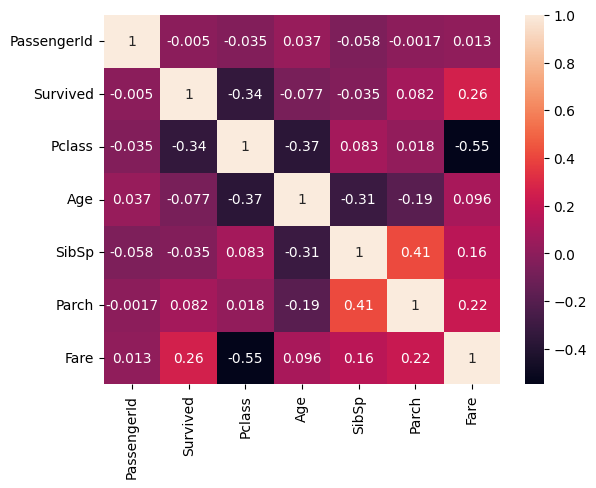

In [13]:
sns.heatmap(numeric_columns.corr(),annot=True)

<Axes: xlabel='Pclass', ylabel='count'>

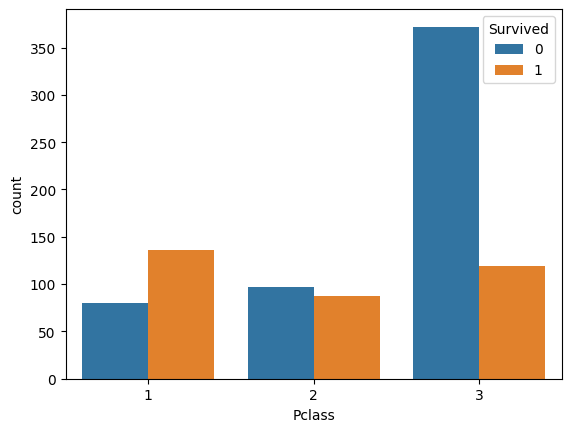

In [ ]:
sns.countplot(data=df_train,x='Pclass',hue='Survived')

In [ ]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [301]:
#Ünvanları alırız.
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')
#İlki büyük küçük a dan Z ye kadar al sonraki harfide aynı şekilde al ve sonrasında '.' bulunsun.

In [252]:
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [302]:
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [303]:
#Fransızca ve diğer dillerdeki ünvanları ingilizceye çevirdik.
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'],'Mr')

In [304]:
df['Title'].value_counts()

Title
Mr        538
Miss      185
Mrs       128
Master     40
Name: count, dtype: int64

In [305]:
#Embark kolonunda en çok tekrar eden değeri doldur.
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)#Birden fazla mod olabilir bu nedenle ilk modu alacağımızı belirtiriz.


In [155]:
df['Embarked'].isnull().sum()

0

In [101]:
#Boş değerleri kontrol ederiz.
df['Age'].isnull().sum()

0

In [193]:
df.groupby('Title')['Age'].transform('mean')

0      33.022727
1      35.873874
2      21.845638
3      35.873874
4      33.022727
         ...    
886    33.022727
887    21.845638
888    21.845638
889    33.022727
890    33.022727
Name: Age, Length: 891, dtype: float64

In [306]:
df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'),inplace=True)#unvanlara göre eksik yaşları doldur.

In [158]:
df['Age'].isnull().sum()

0

In [175]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [ ]:
#Bilet ücretleri
df['Fare'].mean()

33.29547928134557

In [ ]:
df['Fare'].median()

14.4542

In [307]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [160]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [259]:
df.shape

(891, 13)

In [308]:
df.loc[(df['Fare']<80),'Fare_cat']='Normal'
df.loc[((df['Fare']>=80 ) & (df['Fare']<200)),'Fare_cat']='Premium'
df.loc[(df['Fare']>=200 ),'Fare_cat']='Premium_plus'
df.loc[(df['Age']<18),'Age_cat']='Child'
df.loc[(df['Age']>=18) &(df['Age']<30),'Age_cat']='Young'
df.loc[(df['Age']>=30)&(df['Age']<55),'Age_cat']='Middle_Aged'
df.loc[df['Age']>=55,'Age_cat']='Old'
df.loc[df['SibSp']<2,'SibSp_cat']='Normal_Family'
df.loc[(df['SibSp']>=2)&(df['SibSp']<4),'SibSp_cat']='Medium_Family'
df.loc[(df['SibSp']>=3),'SibSp_cat']='Large_Family'
df.loc[df['Parch']==0,'Parch_cat']='Alone'
df.loc[df['Parch']==1,'Parch_cat']='One_parent'
df.loc[df['Parch']==2,'Parch_cat']='Family'
df.loc[df['Parch']>=3,'Parch_cat']='Large_Family'

In [309]:
#Hedef ve özellik Değişkenlerini belirle
X=df.drop(['Survived','PassengerId','Ticket','Name','Cabin','Fare','Age','SibSp','Parch'],axis=1) #Buradaki kolonlar bizim bağımsız değişkenlerimizde bir önemi bulunmamaktadır.
y=df['Survived']


In [311]:
X

,Pclass,Sex,Embarked,Title,Fare_cat,Age_cat,SibSp_cat,Parch_cat
0,3,male,S,Mr,Normal,Young,Normal_Family,Alone
1,1,female,C,Mrs,Normal,Middle_Aged,Normal_Family,Alone
2,3,female,S,Miss,Normal,Young,Normal_Family,Alone
3,1,female,S,Mrs,Normal,Middle_Aged,Normal_Family,Alone
4,3,male,S,Mr,Normal,Middle_Aged,Normal_Family,Alone
...,...,...,...,...,...,...,...,...
886,2,male,S,Mr,Normal,Young,Normal_Family,Alone
887,1,female,S,Miss,Normal,Young,Normal_Family,Alone
888,3,female,S,Miss,Normal,Young,Normal_Family,Family
889,1,male,C,Mr,Normal,Young,Normal_Family,Alone


In [265]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [266]:
num_cols=['Age','Fare']

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [ ]:
#StandardScaler ile ölçeklendirme işlemini yaparız.
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
X[num_cols]=ssc.fit_transform(X[num_cols])

In [34]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,-0.589898,1,0,-0.502445,S,Mr
1,1,female,0.614829,1,0,0.786845,C,Mrs
2,3,female,-0.288716,0,0,-0.488854,S,Miss
3,1,female,0.388942,1,0,0.420730,S,Mrs
4,3,male,0.388942,0,0,-0.486337,S,Mr
...,...,...,...,...,...,...,...,...
886,2,male,-0.213421,0,0,-0.386671,S,Mr
887,1,female,-0.815784,0,0,-0.044381,S,Miss
888,3,female,-0.601521,1,2,-0.176263,S,Miss
889,1,male,-0.288716,0,0,-0.044381,C,Mr


In [35]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [312]:
#Pclass ı OneHotEncoding yapmak için dönüştürürüm.
X['Pclass']=X['Pclass'].astype('object')

In [313]:
X['Pclass'].dtypes

dtype('O')

In [314]:
#Kategorik Verileri Sayısal verilere Çeviririz.
X=pd.get_dummies(X,drop_first=True) #Feature Engineering
#PClass aslında sayısal bir veri değil bir kategorik veri önce objeye çevrilecek sonra get dummies yapılacak

In [271]:
X

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Fare_cat_Premium,Fare_cat_Premium_plus,Age_cat_Middle_Aged,Age_cat_Old,Age_cat_Young,SibSp_cat_Medium_Family,SibSp_cat_Normal_Family,Parch_cat_Family,Parch_cat_Large_Family,Parch_cat_One_parent
0,False,True,True,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
2,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False
4,False,True,True,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,False,True,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False
887,False,False,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False
888,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,True,False,False
889,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False


In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [318]:
X_train

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Fare_cat_Premium,Fare_cat_Premium_plus,Age_cat_Middle_Aged,Age_cat_Old,Age_cat_Young,SibSp_cat_Medium_Family,SibSp_cat_Normal_Family,Parch_cat_Family,Parch_cat_Large_Family,Parch_cat_One_parent
445,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False
650,False,True,True,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False
172,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True
450,True,False,True,False,True,False,True,False,False,False,True,False,False,False,True,True,False,False
314,True,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False
270,False,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False
860,False,True,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False
435,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,False,False


In [319]:
#Model Kütüphaneleri
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
#metrikler
from sklearn.model_selection import cross_val_score
#accuaracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [320]:
#Modeli BUlabilmek için bir çok classification modelini kullanırız.
def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(),
              GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    models=pd.DataFrame({
        'Model':['GaussianNB','BernoulliNB','LogisticRegression','RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier'],
        'Score':results})
    print(models.sort_values(by='Score', ascending=False, ignore_index=True))
    return best_model,max(results), confusion_matrix(model_predict,y_test)

In [321]:
model_classification(X_train,y_train)

Model:  GaussianNB()
Model Accuracy:  0.7700534759358288
Model Confusion Matrix:  [[99 17]
 [26 45]] 

Model Classification Report:                precision    recall  f1-score   support

           0       0.79      0.85      0.82       116
           1       0.73      0.63      0.68        71

    accuracy                           0.77       187
   macro avg       0.76      0.74      0.75       187
weighted avg       0.77      0.77      0.77       187

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.7754010695187166
Model Confusion Matrix:  [[102  19]
 [ 23  43]] 

Model Classification Report:                precision    recall  f1-score   support

           0       0.82      0.84      0.83       121
           1       0.69      0.65      0.67        66

    accuracy                           0.78       187
   macro avg       0.75      0.75      0.75       187
weighted avg       0.77      0.78      0.77       187

------------------------

(RandomForestClassifier(),
 0.8342245989304813,
 array([[107,  19],
        [ 18,  43]]))

In [277]:
'''#En iyi seçenek Gridboosting olduğu için bu modeli tercih ederiz.
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)# Testi kaggle üzeirnden yapacağımız için artık veri setini bölmeden elimizdeki tüm veri setini gönderiyoruz.
model_predict=gb.predict(X_test)
accuracy_score(model_predict,y_test)'''


0.7985074626865671

In [322]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_
y_pred = grid_search.predict(X_test)

In [324]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}

In [323]:
accuracy_score(y_pred,y_test)

0.8097014925373134

In [ ]:
#from all_class import all_classification_models

In [278]:
#Residual ile X değerlerini karşılaştırırım.Düz ise sorun yoktur eğri ise sorun vardır.
residual=model_predict-y_test

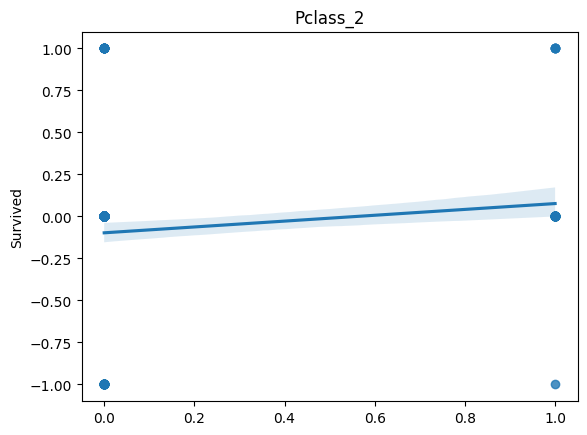

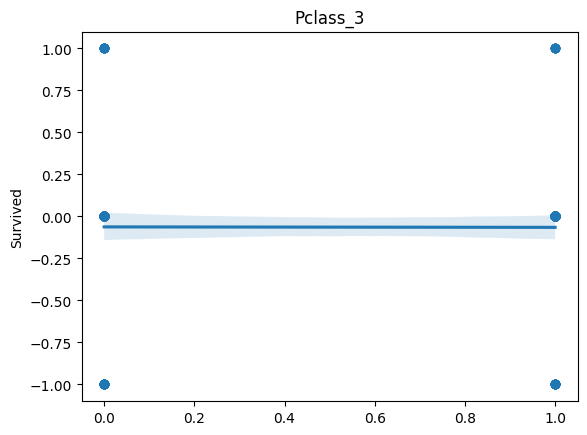

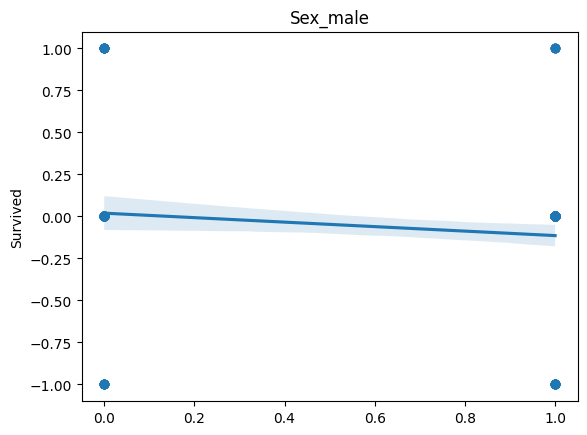

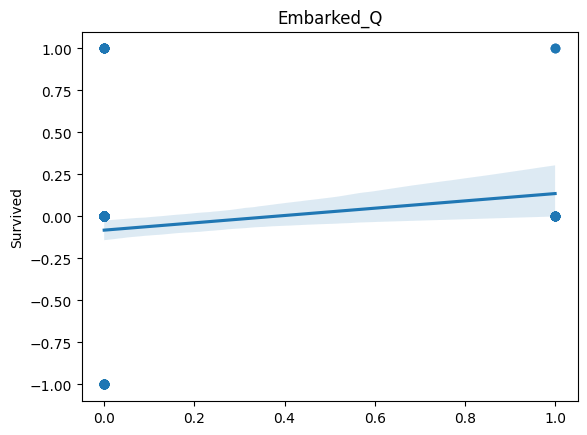

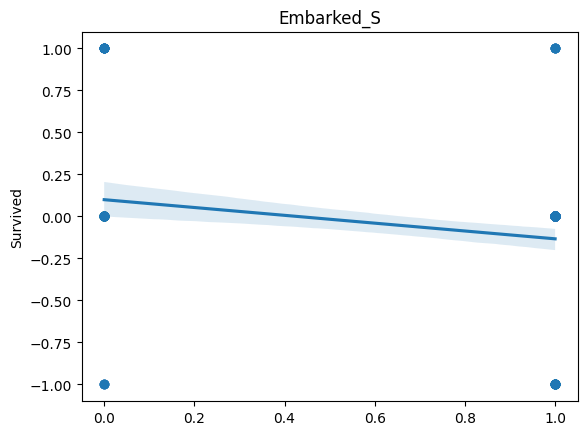

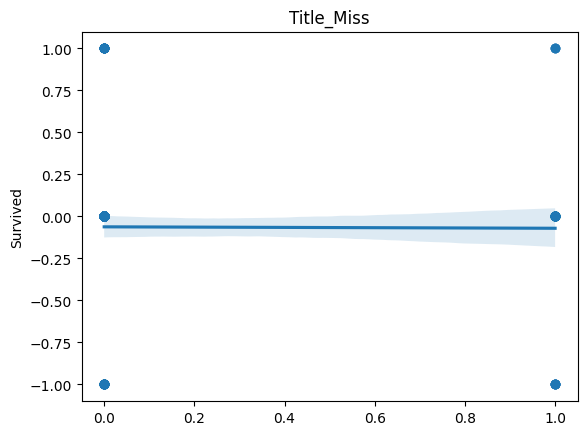

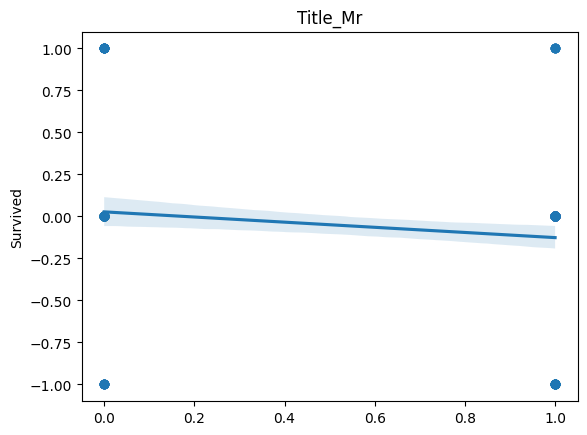

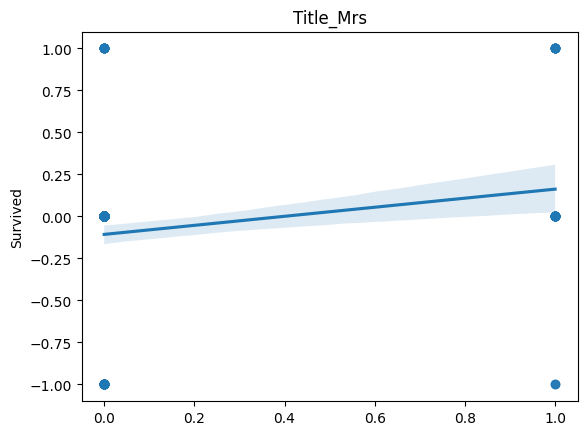

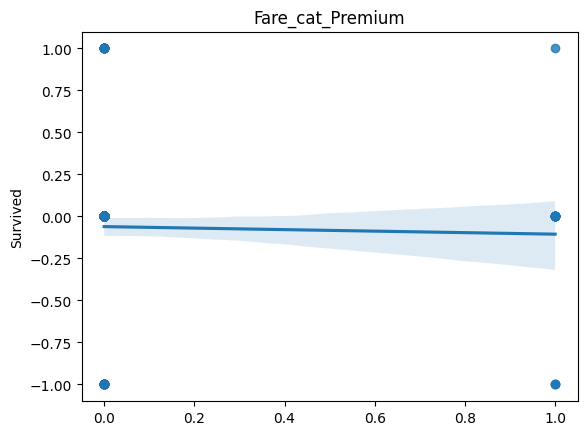

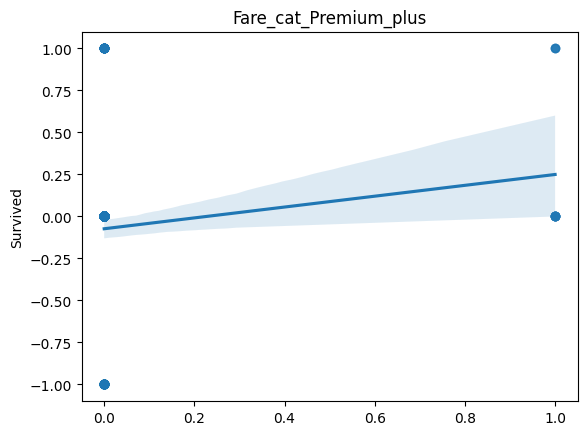

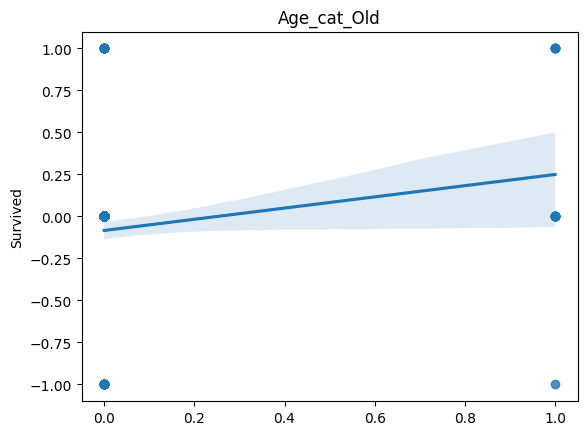

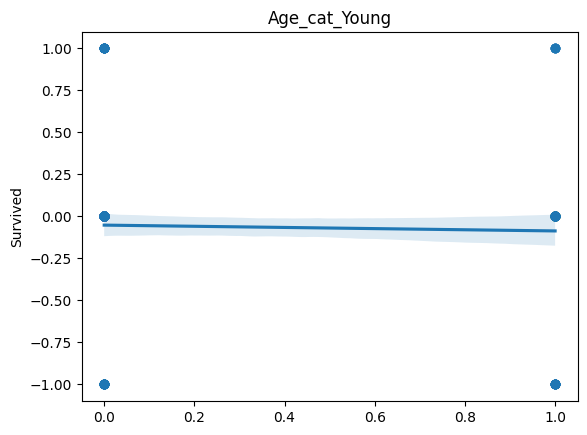

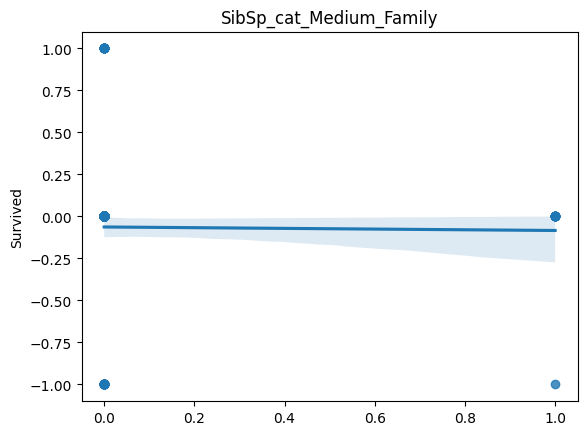

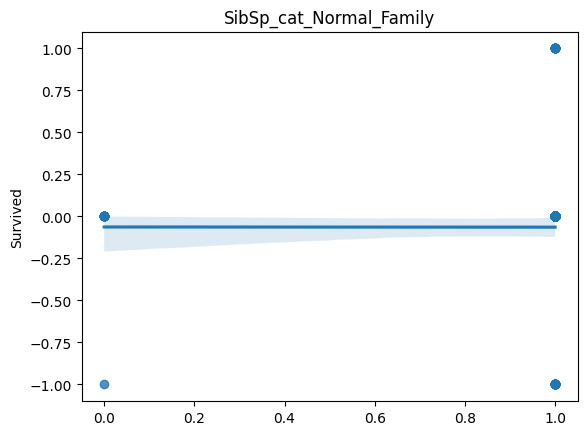

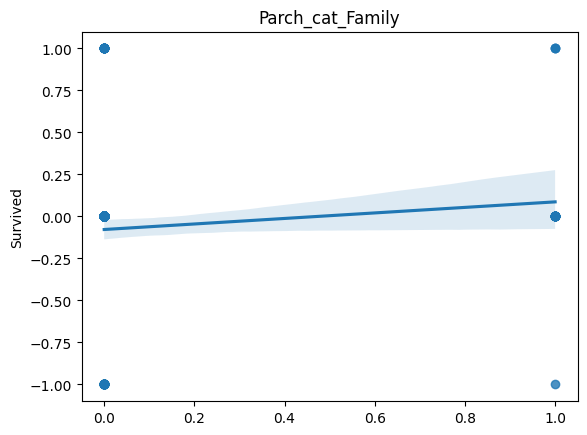

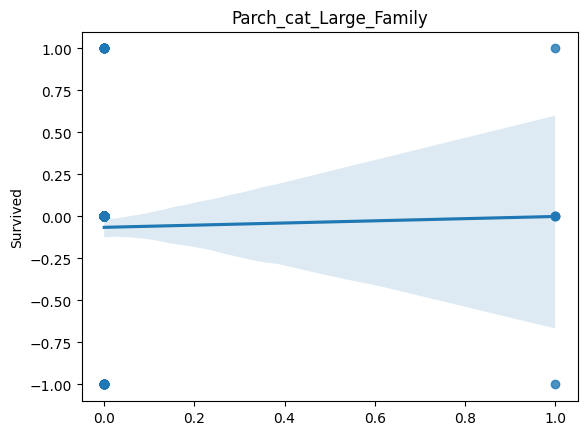

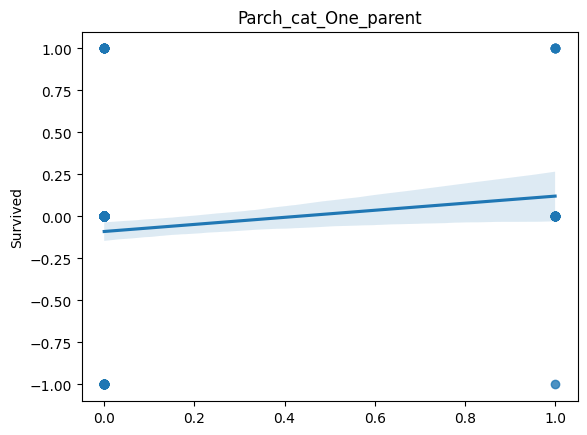

In [216]:
for col in X_test.columns:
  X_np=np.array(X_test[col])
  sns.regplot(x=X_np,y=residual)
  plt.title(col)
  plt.show()

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [89]:
num_col=['Fare','Parch','Age','SibSp']

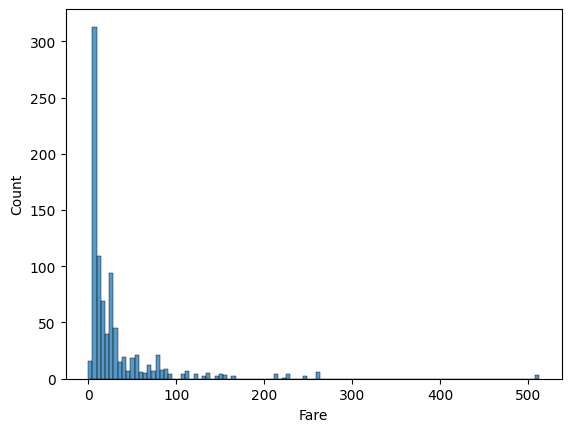

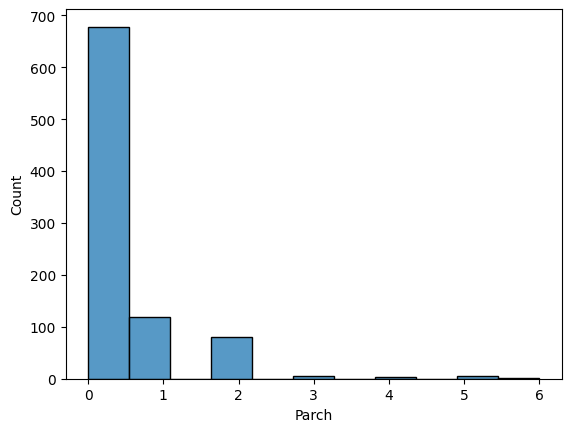

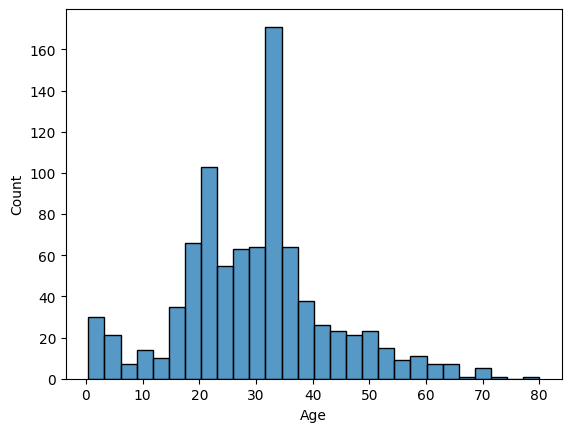

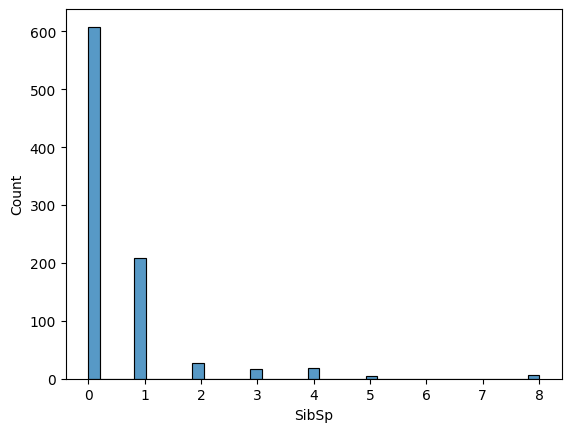

In [91]:
for col in num_col:
  sns.histplot(x=df[col])
  plt.show()

In [279]:
'''from sklearn.model_selection import GridSearchCV
#Parametreleri Belirtirim
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

#gb modeli bir değişkene atarım
gb_model = GradientBoostingClassifier()

# GridSearch parametrelerini girerim
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Grid Search ile eğitirim.
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve modeli nulması için atamalar yaparım.
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Tahminde bulunurum
y_pred_best = best_model.predict(X_test)

# Modeli Değerlendiririm.
accuracy_best = accuracy_score(y_pred_best,y_test)

# Sonuçların çıktısını alırım.
print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Model Accuracy: 0.7985074626865671


Veri Setimiz üzerinden test ettik.

Ve buna bağlı olarak Feature Engineering Yaptık.

Şimdi Tüm veriyle modelimizi eğitebiliriz.

In [325]:
X_train=df.drop(['Survived','PassengerId','Ticket','Name','Cabin','Fare','Age','SibSp','Parch'],axis=1)
y_train=df['Survived']


In [328]:
y_test=pd.read_csv('/content/drive/MyDrive/İBB_Yapay_Zeka_Uzmanlığı_Bootcampi/9.Ders/test (1).csv')


In [350]:
y_test2=pd.read_csv('/content/drive/MyDrive/İBB_Yapay_Zeka_Uzmanlığı_Bootcampi/9.Ders/test (1).csv')

In [329]:
y_test['Title']=y_test['Name'].str.extract('([A-Za-z]+)\.')
#Fransızca ve diğer dillerdeki ünvanları ingilizceye çevirdik.
y_test['Title']=y_test['Title'].replace(['Ms','Mlle'],'Miss')
y_test['Title']=y_test['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
y_test['Title']=y_test['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'],'Mr')
y_test['Embarked'].fillna(y_test['Embarked'].mode()[0],inplace=True)
y_test['Age'].fillna(y_test.groupby('Title')['Age'].transform('mean'),inplace=True)

y_test['Fare'].fillna(y_test['Fare'].mean(),inplace=True)
y_test['Age'].fillna(y_test.groupby('Title')['Age'].transform('mean'),inplace=True)#unvanlara göre eksik yaşları doldur.

In [330]:
y_test.loc[(y_test['Fare']<80),'Fare_cat']='Normal'
y_test.loc[((y_test['Fare']>=80 ) & (y_test['Fare']<200)),'Fare_cat']='Premium'
y_test.loc[(y_test['Fare']>=200 ),'Fare_cat']='Premium_plus'
y_test.loc[(y_test['Age']<18),'Age_cat']='Child'
y_test.loc[(y_test['Age']>=18) &(y_test['Age']<30),'Age_cat']='Young'
y_test.loc[(y_test['Age']>=30)&(y_test['Age']<55),'Age_cat']='Middle_Aged'
y_test.loc[y_test['Age']>=55,'Age_cat']='Old'
y_test.loc[y_test['SibSp']<2,'SibSp_cat']='Normal_Family'
y_test.loc[(y_test['SibSp']>=2)&(y_test['SibSp']<4),'SibSp_cat']='Medium_Family'
y_test.loc[(y_test['SibSp']>=3),'SibSp_cat']='Large_Family'
y_test.loc[y_test['Parch']==0,'Parch_cat']='Alone'
y_test.loc[y_test['Parch']==1,'Parch_cat']='One_parent'
y_test.loc[y_test['Parch']==2,'Parch_cat']='Family'
y_test.loc[y_test['Parch']>=3,'Parch_cat']='Large_Family'


In [331]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
 12  Fare_cat     418 non-null    object 
 13  Age_cat      418 non-null    object 
 14  SibSp_cat    418 non-null    object 
 15  Parch_cat    418 non-null    object 
dtypes: float64(2), int64(4), object(10)
memory usage: 52.4+ KB


In [289]:
y_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Fare_cat         0
Age_cat          0
SibSp_cat        0
Parch_cat        0
dtype: int64

In [332]:
y_test=y_test.drop(['PassengerId','Ticket','Name','Cabin','Fare','Age','SibSp','Parch'],axis=1)

In [338]:
#Kategorik Verileri Sayısal verilere Çeviririz.
y_test=pd.get_dummies(y_test,drop_first=True) #Feature Engineering
#PClass aslında sayısal bir veri değil bir kategorik veri önce objeye çevrilecek sonra get dummies yapılacak

In [340]:
y_test.shape

(418, 17)

In [ ]:
X_test

In [344]:
#En iyi seçenek Gridboosting olduğu için bu modeli tercih ederiz.
gb=GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 100)
gb.fit(X_train,y_train)# Testi kaggle üzeirnden yapacağımız için artık veri setini bölmeden elimizdeki tüm veri setini gönderiyoruz.
model_predict=gb.predict(y_test)


In [347]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_cat,Age_cat,SibSp_cat,Parch_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,Normal,Young,Normal_Family,Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,Normal,Middle_Aged,Normal_Family,Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Normal,Young,Normal_Family,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,Normal,Middle_Aged,Normal_Family,Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,Normal,Middle_Aged,Normal_Family,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Mr,Normal,Young,Normal_Family,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss,Normal,Young,Normal_Family,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.845638,1,2,W./C. 6607,23.4500,NaN,S,Miss,Normal,Young,Normal_Family,Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr,Normal,Young,Normal_Family,Alone


In [351]:
submission = pd.DataFrame({'PassengerId': y_test2.PassengerId, 'Survived': model_predict.astype(int)})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [353]:
submission.to_csv('submission2.csv', index=False) #data frame i csv dosyası oalrak kaydediyor